# 1) CNN Model

##  Packages Importation and Initialization

###  Importation of tensorflow, numpy and keras

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten
from tensorflow.python.keras.optimizers import sgd
from sklearn.model_selection import train_test_split

In [2]:
from keras.datasets import mnist
(xx, yy), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


### Sizes of training, validation and test sets

In [3]:
x_train, x_val, y_train, y_val = train_test_split(xx, yy, test_size=1/6, random_state=42)

In [4]:
print("Size of:")
print("- Training-set:\t\t{}".format(x_train.shape[0]))
print("- Validation-set:\t{}".format(x_val.shape[0]))
print("- Test-set:\t\t{}".format(x_test.shape[0]))
print(" Shape of train target set:{}".format(y_train.shape))

Size of:
- Training-set:		50000
- Validation-set:	10000
- Test-set:		10000
 Shape of train target set:(50000,)


### One hot encoding on _y_train_

In [5]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y_train.reshape(-1, 1))
y_train_onehot = enc.transform(y_train.reshape(-1, 1)).toarray()
y_train_onehot.shape

(50000, 10)

### One hot encoding on _y_val_

In [19]:
enc = OneHotEncoder()
enc.fit(y_test.reshape(-1, 1))
y_test_onehot = enc.transform(y_test.reshape(-1, 1)).toarray()
y_test_onehot.shape

(10000, 10)

### One hot encoding on _y_test_

In [6]:
enc = OneHotEncoder()
enc.fit(y_val.reshape(-1, 1))
y_val_onehot = enc.transform(y_val.reshape(-1, 1)).toarray()
y_val_onehot.shape

(10000, 10)

#  Grid search for hyperparameters

### Definition of the gris search parameters.

In [6]:
# define the grid search parameters
batch_size = [128,256]
learning_rate = [0.01,0.001]
output_channels = [[512,128],[128,512],[256,256]]
activation_fct = ['sigmoid','tanh','relu']

### Grid search over these parameters with 3-fold cross-validation

In [8]:
# %%time
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


def create_model(activation_fct='relu',learning_rate=0.001,output_channels = [512,128]):
    # Start construction of the Keras Sequential model.
    model = Sequential()

    # Add an input layer 
    model.add(InputLayer(input_shape=((28, 28))))

    # Convolutional layers expect images with shape (28, 28, 1)
    model.add(Reshape((28, 28, 1)))

    # First convolutional layer with ReLU-activation and max-pooling.
    model.add(Conv2D(kernel_size=3, strides=2, filters=output_channels[0], padding='same',
                     activation=activation_fct, name='layer_conv1'))
    model.add(MaxPooling2D(pool_size=2, strides=2))

    # Second convolutional layer with ReLU-activation and max-pooling.
    model.add(Conv2D(kernel_size=3, strides=2, filters=output_channels[1], padding='same',
                     activation=activation_fct, name='layer_conv2'))
    model.add(MaxPooling2D(pool_size=2, strides=2))

    # Flatten the 4-rank output of the convolutional layers to 2-rank that can be input to a fully-connected / dense layer.
    model.add(Flatten())

    # Last fully-connected / dense layer with softmax-activation for use in classification.
    model.add(Dense(10, activation='softmax'))
    
    optimizer = sgd(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=1, verbose=1)
# parameters dictionary
param_grid = dict(batch_size=batch_size,
                  activation_fct=activation_fct,
                  learning_rate=learning_rate,
                  output_channels=output_channels)
# perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train_onehot)


### Search results

In [9]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.970417 using {'activation_fct': 'tanh', 'batch_size': 128, 'learning_rate': 0.01, 'output_channels': [512, 128]}
0.936533 (0.002368) with: {'activation_fct': 'sigmoid', 'batch_size': 128, 'learning_rate': 0.01, 'output_channels': [512, 128]}
0.905150 (0.005826) with: {'activation_fct': 'sigmoid', 'batch_size': 128, 'learning_rate': 0.01, 'output_channels': [128, 512]}
0.923883 (0.001568) with: {'activation_fct': 'sigmoid', 'batch_size': 128, 'learning_rate': 0.01, 'output_channels': [256, 256]}
0.786650 (0.002889) with: {'activation_fct': 'sigmoid', 'batch_size': 128, 'learning_rate': 0.001, 'output_channels': [512, 128]}
0.701067 (0.025301) with: {'activation_fct': 'sigmoid', 'batch_size': 128, 'learning_rate': 0.001, 'output_channels': [128, 512]}
0.727733 (0.014551) with: {'activation_fct': 'sigmoid', 'batch_size': 128, 'learning_rate': 0.001, 'output_channels': [256, 256]}
0.907633 (0.005473) with: {'activation_fct': 'sigmoid', 'batch_size': 256, 'learning_rate': 0.01, 'out

The best result in terms of accuracy, 0.970417 (0.001027), is obtained for the following parameters:
    - activation_fct = tanh
    - batch_size =  128
    - learning_rate = 0.01
    - output_channels = [512, 128]
We use those to create the following best model:

## Best Model


### Sequential Model


In [7]:
# Start construction of the Keras Sequential model.
model = Sequential()

# Add an input layer 
model.add(InputLayer(input_shape=((28, 28))))

# Convolutional layers expect images with shape (28, 28, 1)
model.add(Reshape((28, 28, 1)))

# First convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=3, strides=2, filters=512, padding='same',
                 activation='tanh', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Second convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=3, strides=2, filters=128, padding='same',
                 activation='tanh', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the 4-rank output of the convolutional layers to 2-rank that can be input to a fully-connected / dense layer.
model.add(Flatten())

# Last fully-connected / dense layer with softmax-activation for use in classification.
model.add(Dense(10, activation='softmax'))

### Model Summary


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 14, 14, 512)       5120      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 512)         0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 4, 4, 128)         589952    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total para

### Optimizer

In [9]:
optimizer = sgd(lr=0.01)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training & Validation

In [12]:
%%time
history = model.fit(x=x_train, y=y_train_onehot, epochs=10, batch_size=128, validation_data=(x_val, y_val_onehot),verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2899 - acc: 0.9409 - val_loss: 0.2404 - val_acc: 0.9520
Epoch 2/10
 - 6s - loss: 0.2086 - acc: 0.9561 - val_loss: 0.1879 - val_acc: 0.9604
Epoch 3/10
 - 6s - loss: 0.1684 - acc: 0.9632 - val_loss: 0.1579 - val_acc: 0.9655
Epoch 4/10
 - 6s - loss: 0.1430 - acc: 0.9689 - val_loss: 0.1400 - val_acc: 0.9695
Epoch 5/10
 - 6s - loss: 0.1251 - acc: 0.9725 - val_loss: 0.1259 - val_acc: 0.9718
Epoch 6/10
 - 6s - loss: 0.1124 - acc: 0.9753 - val_loss: 0.1149 - val_acc: 0.9736
Epoch 7/10
 - 6s - loss: 0.1018 - acc: 0.9777 - val_loss: 0.1087 - val_acc: 0.9738
Epoch 8/10
 - 6s - loss: 0.0938 - acc: 0.9797 - val_loss: 0.1013 - val_acc: 0.9752
Epoch 9/10
 - 6s - loss: 0.0867 - acc: 0.9812 - val_loss: 0.0961 - val_acc: 0.9765
Epoch 10/10
 - 6s - loss: 0.0810 - acc: 0.9823 - val_loss: 0.0929 - val_acc: 0.9770
Wall time: 58.5 s


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Accuracy plot

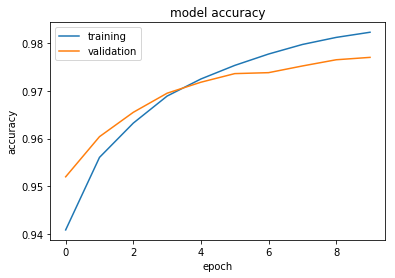

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'])
plt.show()

#### Loss plot

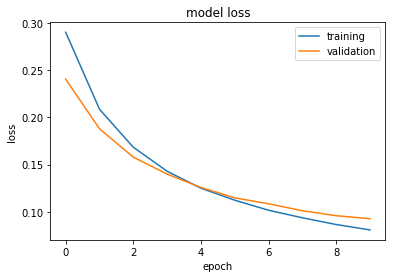

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.legend(['training','validation'])
plt.xlabel('epoch')
plt.show()

# Evaluation


Now the sequential model is evaluated using the test set. The accuracy and the loss are shown below.

In [20]:
result = model.evaluate(x_test, y_test_onehot)

10000/10000 [==============================] - 1s 95us/step


Performance metrics for the test-set.

In [21]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.09201463797166944
acc 0.9766


# 2) Comparison with the MLP Model derived in Question 1